<a href="https://colab.research.google.com/github/kallol121/Breast-Cancer-Treatment-/blob/main/breast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving breast cancerss.webp to breast cancerss.webp
Dataset Shape: (569, 32)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    f

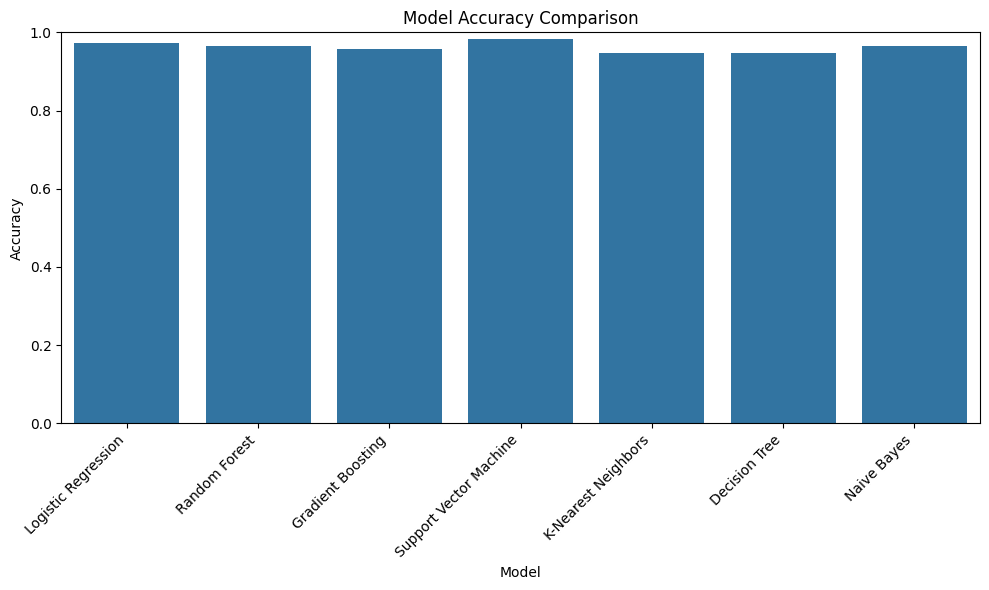

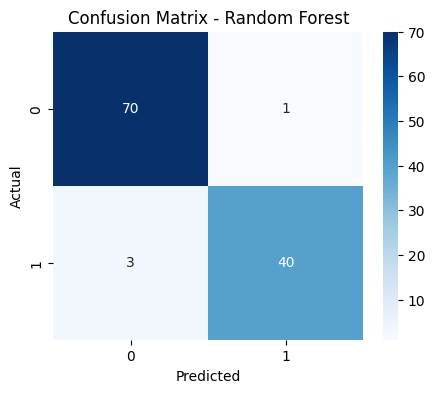

In [5]:
# ===============================
# Breast Cancer Classification
# ===============================

# Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Step 3: Load dataset
data = pd.read_csv("breast-cancer.csv")

# Step 4: Explore dataset
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

# Step 5: Drop unnecessary column
data.drop('id', axis=1, inplace=True)

# Step 6: Encode target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
# M = 1, B = 0

print("\nDiagnosis Count:")
print(data['diagnosis'].value_counts())

# Step 7: Split features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 9: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 10: Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Step 11: Train & Evaluate Models
results = []

for name, model in models.items():
    print("\n==============================")
    print(f"Training Model: {name}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Accuracy": accuracy
    })

# Step 12: Results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Step 13: Accuracy Comparison Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.xticks(rotation=45, ha='right')
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Step 14: Confusion Matrix for Best Model (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()